In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


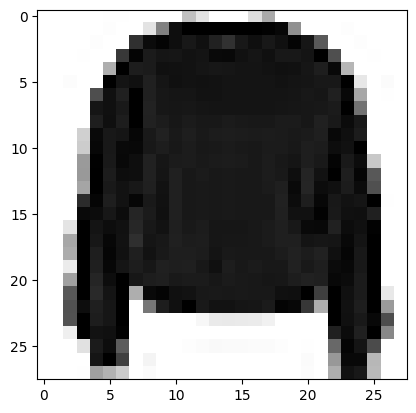

Hình này là: 2


In [3]:
picture = train_images[7]
plt.imshow(picture, cmap = plt.cm.binary)
plt.show()
print("Hình này là:", train_labels[7])

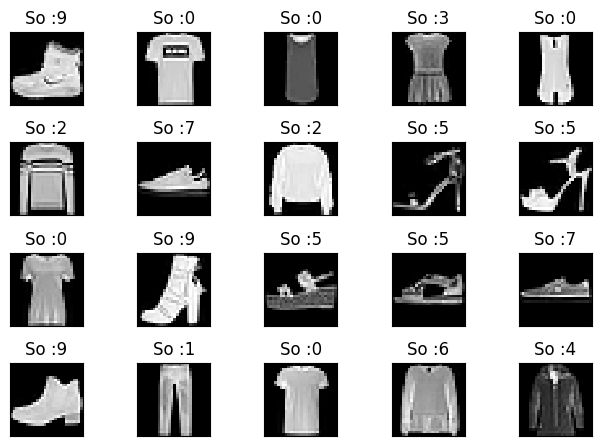

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Sequential()

model.add(Dense(512, activation= 'relu', input_shape= (28*28,))) 
model.add(Dense(512, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
     

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
     

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)   

In [7]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs=10, batch_size= 60)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
1000/1000 [==============================] - 14s 13ms/step - loss: 0.5010 - accuracy: 0.8163
Epoch 2/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.3681 - accuracy: 0.8647
Epoch 3/10
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3374 - accuracy: 0.8777
Epoch 4/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3188 - accuracy: 0.8842
Epoch 5/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3047 - accuracy: 0.8890
Epoch 6/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2962 - accuracy: 0.8940
Epoch 7/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2867 - accuracy: 0.8968
Epoch 8/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2801 - accuracy: 0.8980
Epoch 9/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2750 - accuracy: 0.9007
Epoch 10/10
313/313 [==============================] - 1s 3ms/st

In [8]:
model.save('fashion_mnist.h5')

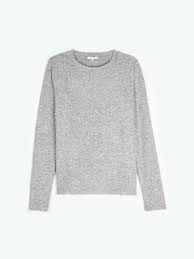

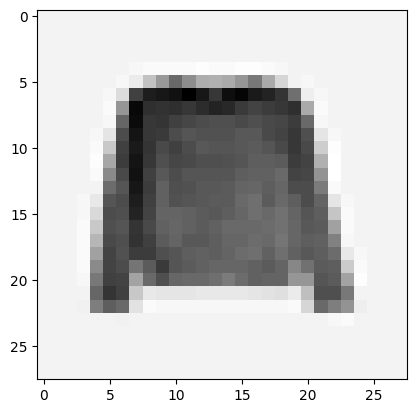

1/1 [==============================] - 0s 146ms/step
Predicted digit: 8


In [12]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display

#Load model
model = load_model('fashion_mnist.h5')

#Open image uploaded 
img = Image.open('/content/jumber.jpg')

#Display image uploaded
display(img)

#Convert to gray Image
img = img.convert('L')

#Resize to 28x28 image
img = img.resize((28,28))

#Show image
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()

#Convert image to numpy array
img = np.array(img)

#Reshape array to Vector(1, 28*28)
img = img.reshape(1,28*28)

#Rescale pixel value from (0, 255) to (0, 1)
img = img.astype('float32')/255

#Prediction and displaying the result on the screen
predictions = model.predict(img)
digit = np.argmax(predictions)
print('Predicted digit:', digit)